<a href="https://colab.research.google.com/github/Maxmuleiv/Proyecto-Industrial/blob/master/AnalisisPobrezaMultidimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reset-f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cálculo correlaciones carencias 5D

In [0]:
url1="https://github.com/Maxmuleiv/Proyecto-Industrial/blob/master/pobreza5d.csv?raw=true" #url base datos 
datos5D = pd.read_csv(url1,";") #importación base datos pobres 5d

In [0]:
pearson5d = datos5D.corr(method='pearson')
kendall5d = datos5D.corr(method='kendall')
spearman5d = datos5D.corr(method='spearman')

In [5]:
pearson5d

,Asistencia,Rezago escolar,Escolaridad,Malnutricion infantil,Adscripcion a sistema de salud,Atencion,Ocupacion,Seguridad social,Jubilaciones,Habitabilidad,Servicios Basicos (viv.),Entorno,Apoyo y participacion social,Trato igualitario,Seguridad
Asistencia,1.000000,-0.007841,0.006213,0.039036,-0.043373,-0.037923,-0.006070,-0.041455,-0.092459,-0.008006,-0.064833,-0.064750,0.032862,0.014113,0.026591
Rezago escolar,-0.007841,1.000000,0.022984,-0.029365,-0.069186,-0.036572,-0.035653,-0.029125,-0.098603,-0.009158,-0.073098,-0.059509,0.013812,0.000777,0.029628
Escolaridad,0.006213,0.022984,1.000000,-0.091438,-0.172337,-0.169164,-0.132318,-0.059054,-0.027922,-0.086135,0.037065,-0.080734,-0.000640,-0.058394,-0.033395
Malnutricion infantil,0.039036,-0.029365,-0.091438,1.000000,-0.090749,-0.039809,-0.056007,-0.052781,-0.117543,0.031197,-0.084158,-0.079017,-0.014017,0.017475,0.012945
Adscripcion a sistema de salud,-0.043373,-0.069186,-0.172337,-0.090749,1.000000,0.020561,0.032824,0.055320,-0.047741,-0.121833,-0.135915,-0.079359,0.028230,0.012834,0.000125
Atencion,-0.037923,-0.036572,-0.169164,-0.039809,0.020561,1.000000,0.014168,-0.056477,0.013289,-0.077023,-0.091136,-0.020451,-0.006665,0.040656,0.016715
Ocupacion,-0.006070,-0.035653,-0.132318,-0.056007,0.032824,0.014168,1.000000,-0.175732,-0.070105,-0.078729,-0.163222,-0.048096,0.004227,0.024595,0.030576
Seguridad social,-0.041455,-0.029125,-0.059054,-0.052781,0.055320,-0.056477,-0.175732,1.000000,-0.064151,-0.110590,-0.100594,-0.280446,-0.020193,-0.000537,0.009390
Jubilaciones,-0.092459,-0.098603,-0.027922,-0.117543,-0.047741,0.013289,-0.070105,-0.064151,1.000000,-0.177482,-0.140702,-0.049791,-0.013251,-0.046831,-0.031494
Habitabilidad,-0.008006,-0.009158,-0.086135,0.031197,-0.121833,-0.077023,-0.078729,-0.110590,-0.177482,1.000000,-0.050586,-0.086836,0.040439,0.070899,0.067803


In [6]:
kendall5d

,Asistencia,Rezago escolar,Escolaridad,Malnutricion infantil,Adscripcion a sistema de salud,Atencion,Ocupacion,Seguridad social,Jubilaciones,Habitabilidad,Servicios Basicos (viv.),Entorno,Apoyo y participacion social,Trato igualitario,Seguridad
Asistencia,1.000000,-0.007841,0.006213,0.039036,-0.043373,-0.037923,-0.006070,-0.041455,-0.092459,-0.008006,-0.064833,-0.064750,0.032862,0.014113,0.026591
Rezago escolar,-0.007841,1.000000,0.022984,-0.029365,-0.069186,-0.036572,-0.035653,-0.029125,-0.098603,-0.009158,-0.073098,-0.059509,0.013812,0.000777,0.029628
Escolaridad,0.006213,0.022984,1.000000,-0.091438,-0.172337,-0.169164,-0.132318,-0.059054,-0.027922,-0.086135,0.037065,-0.080734,-0.000640,-0.058394,-0.033395
Malnutricion infantil,0.039036,-0.029365,-0.091438,1.000000,-0.090749,-0.039809,-0.056007,-0.052781,-0.117543,0.031197,-0.084158,-0.079017,-0.014017,0.017475,0.012945
Adscripcion a sistema de salud,-0.043373,-0.069186,-0.172337,-0.090749,1.000000,0.020561,0.032824,0.055320,-0.047741,-0.121833,-0.135915,-0.079359,0.028230,0.012834,0.000125
Atencion,-0.037923,-0.036572,-0.169164,-0.039809,0.020561,1.000000,0.014168,-0.056477,0.013289,-0.077023,-0.091136,-0.020451,-0.006665,0.040656,0.016715
Ocupacion,-0.006070,-0.035653,-0.132318,-0.056007,0.032824,0.014168,1.000000,-0.175732,-0.070105,-0.078729,-0.163222,-0.048096,0.004227,0.024595,0.030576
Seguridad social,-0.041455,-0.029125,-0.059054,-0.052781,0.055320,-0.056477,-0.175732,1.000000,-0.064151,-0.110590,-0.100594,-0.280446,-0.020193,-0.000537,0.009390
Jubilaciones,-0.092459,-0.098603,-0.027922,-0.117543,-0.047741,0.013289,-0.070105,-0.064151,1.000000,-0.177482,-0.140702,-0.049791,-0.013251,-0.046831,-0.031494
Habitabilidad,-0.008006,-0.009158,-0.086135,0.031197,-0.121833,-0.077023,-0.078729,-0.110590,-0.177482,1.000000,-0.050586,-0.086836,0.040439,0.070899,0.067803


In [7]:
spearman5d

,Asistencia,Rezago escolar,Escolaridad,Malnutricion infantil,Adscripcion a sistema de salud,Atencion,Ocupacion,Seguridad social,Jubilaciones,Habitabilidad,Servicios Basicos (viv.),Entorno,Apoyo y participacion social,Trato igualitario,Seguridad
Asistencia,1.000000,-0.007841,0.006213,0.039036,-0.043373,-0.037923,-0.006070,-0.041455,-0.092459,-0.008006,-0.064833,-0.064750,0.032862,0.014113,0.026591
Rezago escolar,-0.007841,1.000000,0.022984,-0.029365,-0.069186,-0.036572,-0.035653,-0.029125,-0.098603,-0.009158,-0.073098,-0.059509,0.013812,0.000777,0.029628
Escolaridad,0.006213,0.022984,1.000000,-0.091438,-0.172337,-0.169164,-0.132318,-0.059054,-0.027922,-0.086135,0.037065,-0.080734,-0.000640,-0.058394,-0.033395
Malnutricion infantil,0.039036,-0.029365,-0.091438,1.000000,-0.090749,-0.039809,-0.056007,-0.052781,-0.117543,0.031197,-0.084158,-0.079017,-0.014017,0.017475,0.012945
Adscripcion a sistema de salud,-0.043373,-0.069186,-0.172337,-0.090749,1.000000,0.020561,0.032824,0.055320,-0.047741,-0.121833,-0.135915,-0.079359,0.028230,0.012834,0.000125
Atencion,-0.037923,-0.036572,-0.169164,-0.039809,0.020561,1.000000,0.014168,-0.056477,0.013289,-0.077023,-0.091136,-0.020451,-0.006665,0.040656,0.016715
Ocupacion,-0.006070,-0.035653,-0.132318,-0.056007,0.032824,0.014168,1.000000,-0.175732,-0.070105,-0.078729,-0.163222,-0.048096,0.004227,0.024595,0.030576
Seguridad social,-0.041455,-0.029125,-0.059054,-0.052781,0.055320,-0.056477,-0.175732,1.000000,-0.064151,-0.110590,-0.100594,-0.280446,-0.020193,-0.000537,0.009390
Jubilaciones,-0.092459,-0.098603,-0.027922,-0.117543,-0.047741,0.013289,-0.070105,-0.064151,1.000000,-0.177482,-0.140702,-0.049791,-0.013251,-0.046831,-0.031494
Habitabilidad,-0.008006,-0.009158,-0.086135,0.031197,-0.121833,-0.077023,-0.078729,-0.110590,-0.177482,1.000000,-0.050586,-0.086836,0.040439,0.070899,0.067803


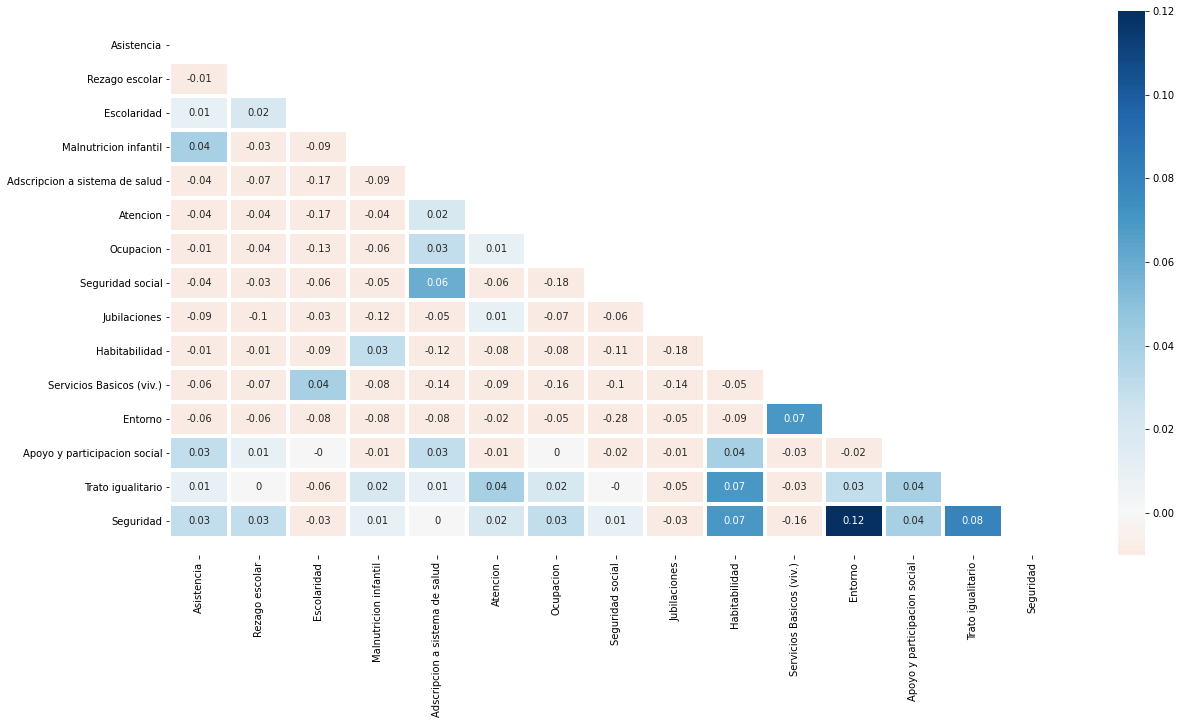

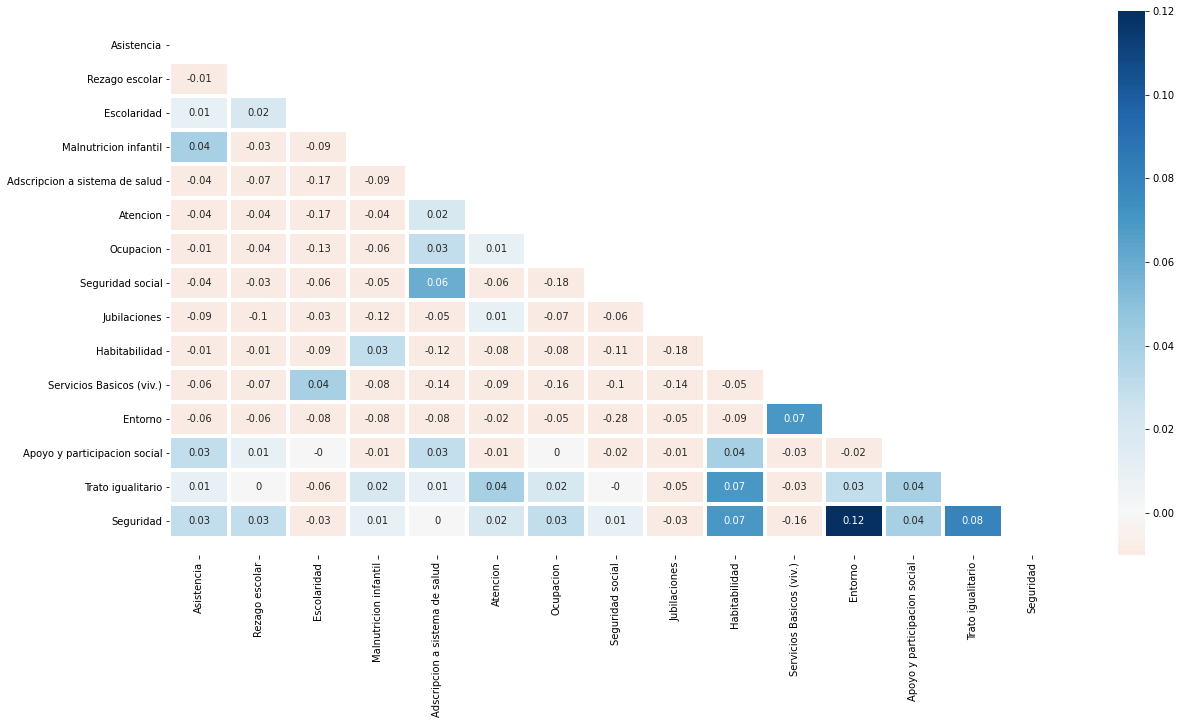

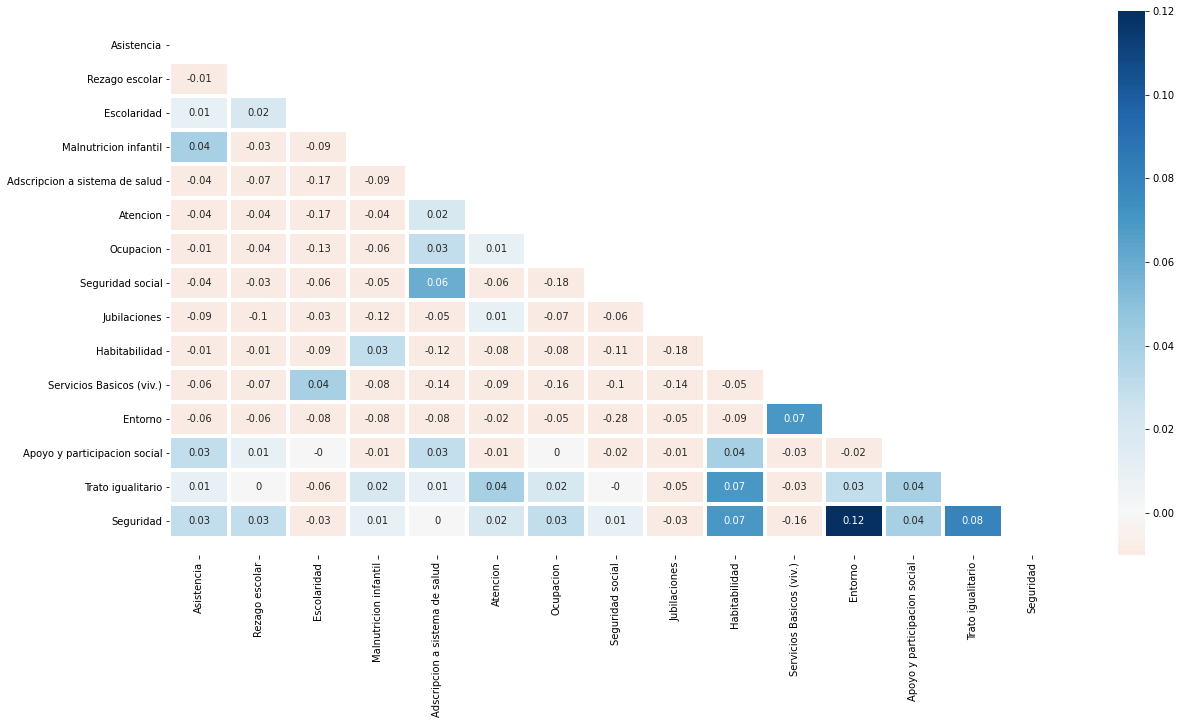

In [8]:
# OBTENCION HEATMAPS PEARSON, KENDALL Y SPEARMAN

plt.figure(figsize = (20,10)) #arreglar el tamaño del gráfico

mask = np.zeros(pearson5d.shape, dtype=bool) #eliminacion datos simetricos
mask[np.triu_indices(len(mask))] = True

mapapearson5d=sb.heatmap(pearson5d.values.round(2), xticklabels=pearson5d.columns, # heatmap pearson
            yticklabels=pearson5d.columns,vmin = -0.01, vmax = 0.12, center = 0, cmap = "RdBu",annot=True, mask=mask, linewidths=3)

b, t = mapapearson5d.get_ylim() # identificar limites de corte
mapapearson5d.set_ylim(b + 0.5, t - 0.5) #redefinir limites de corte

plt.savefig("HeatMapPearson.png",bbox_inches="tight")
plt.savefig("HeatMapPearson.svg",bbox_inches="tight")
plt.show()

plt.figure(figsize = (20,10)) #arreglar el tamaño del gráfico

mask = np.zeros(kendall5d.shape, dtype=bool) #eliminacion datos simetricos
mask[np.triu_indices(len(mask))] = True


mapakendall5d=sb.heatmap(kendall5d.values.round(2), xticklabels=kendall5d.columns, # heatmap kendall
            yticklabels=kendall5d.columns,vmin = -0.01, vmax = 0.12, center = 0, cmap = "RdBu",annot=True, mask=mask, linewidths=3)

b, t = mapakendall5d.get_ylim() # identificar limites de corte
mapakendall5d.set_ylim(b + 0.5, t - 0.5) #redefinir limites de corte

plt.savefig("HeatMapKendall.png",bbox_inches="tight")
plt.savefig("HeatMapKendall.svg",bbox_inches="tight")
plt.show()


plt.figure(figsize = (20,10)) #arreglar el tamaño del gráfico

mask = np.zeros(spearman5d.shape, dtype=bool) #eliminacion datos simetricos
mask[np.triu_indices(len(mask))] = True


mapaspearman5d=sb.heatmap(spearman5d.values.round(2), xticklabels=spearman5d.columns, #heatmap spearman
            yticklabels=spearman5d.columns,vmin = -0.01, vmax = 0.12, center = 0, cmap = "RdBu",annot=True, mask=mask, linewidths=3)

b, t = mapaspearman5d.get_ylim() # identificar limites de corte
mapaspearman5d.set_ylim(b + 0.5, t - 0.5) #redefinir limites de corte

plt.savefig("HeatMapSpearman.png",bbox_inches="tight")
plt.savefig("HeatMapSpearman.svg",bbox_inches="tight")
plt.show()



In [0]:
# importacion datos correlaciones excel

pearson5d.to_excel(excel_writer = "pearson5d.xlsx")
kendall5d.to_excel(excel_writer = "kendall5d.xlsx")
spearman5d.to_excel(excel_writer = "spearman5d.xlsx")

In [0]:
import networkx as nx

In [0]:
indices = pearson5d.index.values

In [0]:
matriz5d = np.asmatrix(pearson5d)

In [13]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(matriz5d)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: matriz5d[x,x]) # revisar aca, redefinicion de las etiquetas

#shows the edges with their corresponding weights
G.edges(data=True)

EdgeDataView([(1.0, 1.0, {'weight': 1.0})])

In [0]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 
    create_corr_network_1(G)

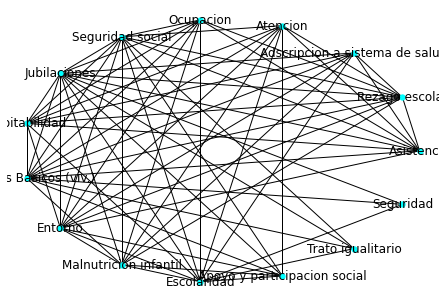

In [15]:
# Transform it in a links data frame (3 columns only):
links = pearson5d.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] < 0) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw_circular(G, with_labels=True, node_color='cyan', node_size=40, edge_color='black', linewidths=0.01, font_size=12)

#b, t = mapa5d.get_ylim() # identificar limites de corte
#mapa5d.set_ylim(b + 0.5, t - 0.5) #redefinir limites de corte

# Cálculo correlaciones por dimensiones agrupadas (5D)


In [0]:
url2="https://github.com/Maxmuleiv/Proyecto-Industrial/blob/master/dimensiones5D.csv?raw=true" #url base datos 
dimensiones = pd.read_csv(url2,";") #importación base datos por dimension

In [0]:
pearsonDim = dimensiones.corr(method='pearson')
kendallDim = dimensiones.corr(method='kendall')
spearmanDim = dimensiones.corr(method='spearman')
covarianzaDim=dimensiones.cov()

In [39]:
pearsonDim

,Educacion,Salud,Trabajo y seguridad social,Vivienda y entorno,Redes y cohesion social
Educacion,1.000000,-0.230315,-0.195242,-0.133706,-0.009286
Salud,-0.230315,1.000000,-0.087620,-0.233176,0.035926
Trabajo y seguridad social,-0.195242,-0.087620,1.000000,-0.444611,-0.014127
Vivienda y entorno,-0.133706,-0.233176,-0.444611,1.000000,0.037269
Redes y cohesion social,-0.009286,0.035926,-0.014127,0.037269,1.000000


In [40]:
kendallDim

,Educacion,Salud,Trabajo y seguridad social,Vivienda y entorno,Redes y cohesion social
Educacion,1.000000,-0.223467,-0.179857,-0.125307,-0.010497
Salud,-0.223467,1.000000,-0.083010,-0.219731,0.036455
Trabajo y seguridad social,-0.179857,-0.083010,1.000000,-0.411786,-0.014283
Vivienda y entorno,-0.125307,-0.219731,-0.411786,1.000000,0.038666
Redes y cohesion social,-0.010497,0.036455,-0.014283,0.038666,1.000000


In [41]:
spearmanDim

,Educacion,Salud,Trabajo y seguridad social,Vivienda y entorno,Redes y cohesion social
Educacion,1.000000,-0.235743,-0.196586,-0.138452,-0.011182
Salud,-0.235743,1.000000,-0.088549,-0.236509,0.037780
Trabajo y seguridad social,-0.196586,-0.088549,1.000000,-0.450620,-0.015356
Vivienda y entorno,-0.138452,-0.236509,-0.450620,1.000000,0.042005
Redes y cohesion social,-0.011182,0.037780,-0.015356,0.042005,1.000000


In [42]:
covarianzaDim

,Educacion,Salud,Trabajo y seguridad social,Vivienda y entorno,Redes y cohesion social
Educacion,0.364410,-0.076518,-0.081091,-0.062438,-0.003379
Salud,-0.076518,0.302893,-0.033178,-0.099273,0.011917
Trabajo y seguridad social,-0.081091,-0.033178,0.473383,-0.236640,-0.005859
Vivienda y entorno,-0.062438,-0.099273,-0.236640,0.598415,0.017377
Redes y cohesion social,-0.003379,0.011917,-0.005859,0.017377,0.363287


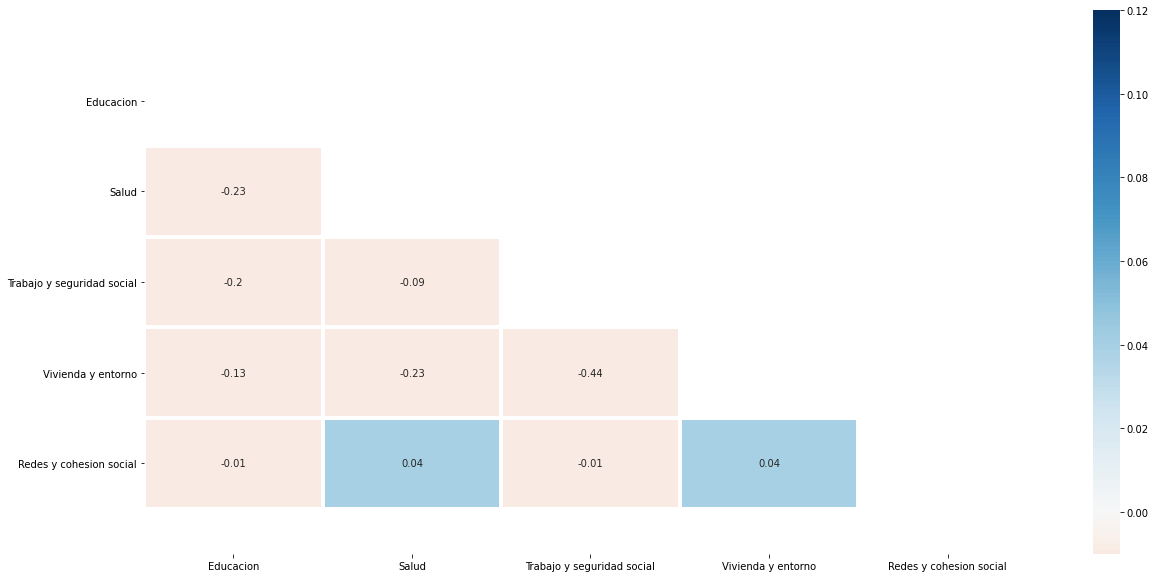

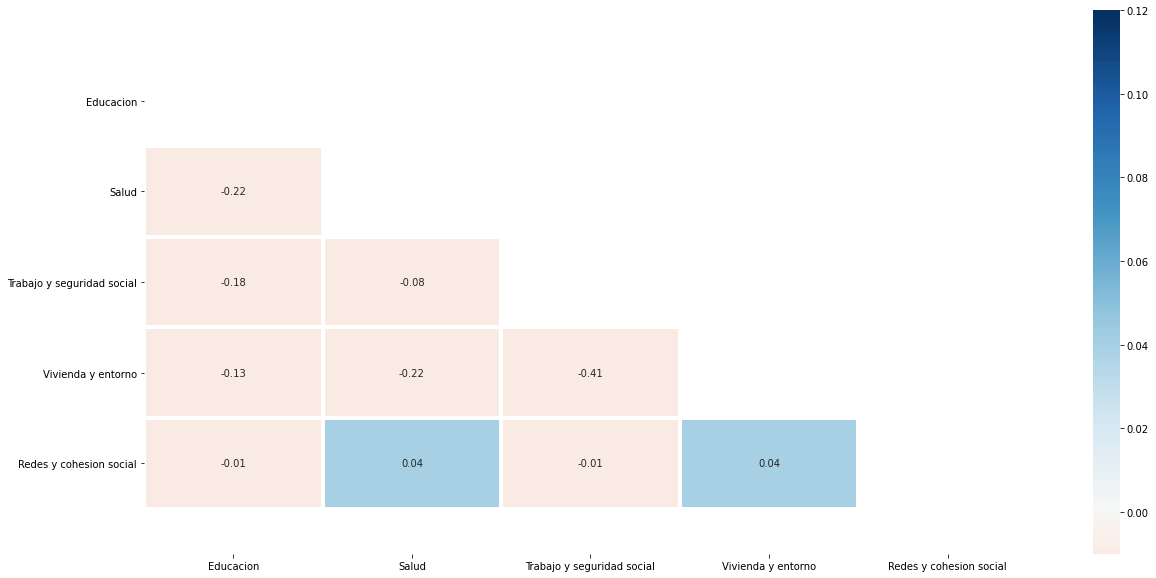

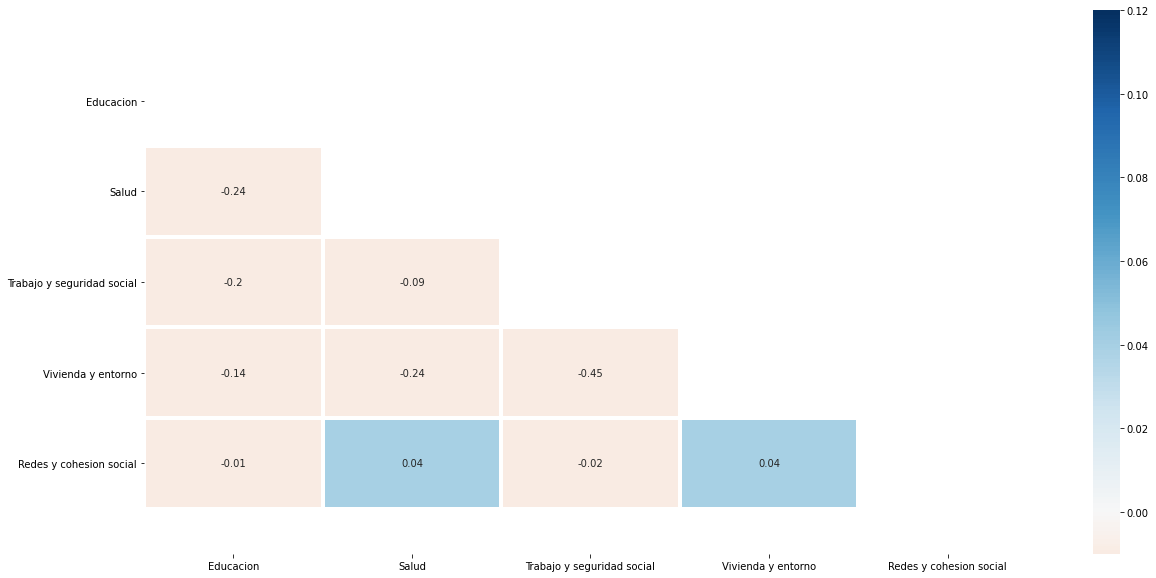

In [43]:
# OBTENCION HEATMAPS PEARSON, KENDALL Y SPEARMAN POR DIMENSIONES

plt.figure(figsize = (20,10)) #arreglar el tamaño del gráfico

mask = np.zeros(pearsonDim.shape, dtype=bool) #eliminacion datos simetricos
mask[np.triu_indices(len(mask))] = True

mapapearsonDim=sb.heatmap(pearsonDim.values.round(2), xticklabels=pearsonDim.columns, # heatmap pearson
            yticklabels=pearsonDim.columns,vmin = -0.01, vmax = 0.12, center = 0, cmap = "RdBu",annot=True, mask=mask, linewidths=3)

b, t = mapapearsonDim.get_ylim() # identificar limites de corte
mapapearsonDim.set_ylim(b + 0.5, t - 0.5) #redefinir limites de corte

plt.savefig("HeatMapPearsonDim.png",bbox_inches="tight")
plt.savefig("HeatMapPearsonDim.svg",bbox_inches="tight")
plt.show()

plt.figure(figsize = (20,10)) #arreglar el tamaño del gráfico

mask = np.zeros(kendallDim.shape, dtype=bool) #eliminacion datos simetricos
mask[np.triu_indices(len(mask))] = True


mapakendallDim=sb.heatmap(kendallDim.values.round(2), xticklabels=kendallDim.columns, # heatmap kendall
            yticklabels=kendallDim.columns,vmin = -0.01, vmax = 0.12, center = 0, cmap = "RdBu",annot=True, mask=mask, linewidths=3)

b, t = mapakendallDim.get_ylim() # identificar limites de corte
mapakendallDim.set_ylim(b + 0.5, t - 0.5) #redefinir limites de corte

plt.savefig("HeatMapKendallDim.png",bbox_inches="tight")
plt.savefig("HeatMapKendallDim.svg",bbox_inches="tight")
plt.show()


plt.figure(figsize = (20,10)) #arreglar el tamaño del gráfico

mask = np.zeros(spearmanDim.shape, dtype=bool) #eliminacion datos simetricos
mask[np.triu_indices(len(mask))] = True


mapaspearmanDim=sb.heatmap(spearmanDim.values.round(2), xticklabels=spearmanDim.columns, #heatmap spearman
            yticklabels=spearmanDim.columns,vmin = -0.01, vmax = 0.12, center = 0, cmap = "RdBu",annot=True, mask=mask, linewidths=3)

b, t = mapaspearmanDim.get_ylim() # identificar limites de corte
mapaspearmanDim.set_ylim(b + 0.5, t - 0.5) #redefinir limites de corte

plt.savefig("HeatMapSpearmanDim.png",bbox_inches="tight")
plt.savefig("HeatMapSpearmanDim.svg",bbox_inches="tight")
plt.show()



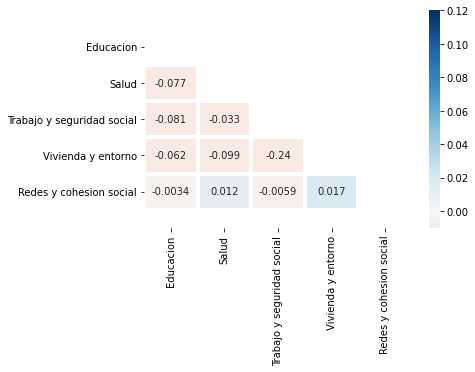

In [44]:
#HEATMAP COVARIANZA

mask = np.zeros(covarianzaDim.shape, dtype=bool) #eliminacion datos simetricos
mask[np.triu_indices(len(mask))] = True


mapacovarianzaDim=sb.heatmap(covarianzaDim.values.round(6), xticklabels=covarianzaDim.columns, #heatmap spearman
            yticklabels=covarianzaDim.columns,vmin = -0.01, vmax = 0.12, center = 0, cmap = "RdBu",annot=True, mask=mask, linewidths=3)

b, t = mapacovarianzaDim.get_ylim() # identificar limites de corte
mapacovarianzaDim.set_ylim(b + 0.5, t - 0.5) #redefinir limites de corte

plt.savefig("HeatMapCovarianzaDim.png",bbox_inches="tight")
plt.savefig("HeatMapCovarianzaDim.svg",bbox_inches="tight")
plt.show()

In [0]:
# importacion datos correlaciones excel

pearsonDim.to_excel(excel_writer = "pearsonDim.xlsx")
kendallDim.to_excel(excel_writer = "kendallDim.xlsx")
spearmanDim.to_excel(excel_writer = "spearmanDim.xlsx")

In [0]:
covarianzaDim.to_excel(excel_writer = "covarianzaDim.xlsx")

In [47]:
dimensiones2=dimensiones.T
dimensiones2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,44932,44933,44934,44935,44936,44937,44938,44939,44940,44941,44942,44943,44944,44945,44946,44947,44948,44949,44950,44951,44952,44953,44954,44955,44956,44957,44958,44959,44960,44961,44962,44963,44964,44965,44966,44967,44968,44969,44970,44971
Educacion,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,0,...,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1
Salud,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
Trabajo y seguridad social,1,3,3,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,0,1,1,2,2
Vivienda y entorno,1,2,2,3,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,...,2,2,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,1,1,2,2,2,2,3,1,1,1,1
Redes y cohesion social,0,2,2,2,2,1,1,1,2,2,2,2,2,2,2,2,0,0,0,0,0,0,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
dimensionesR=np.corrcoef(dimensiones2)

In [49]:
dimensiones.head()

,Educacion,Salud,Trabajo y seguridad social,Vivienda y entorno,Redes y cohesion social
0,1,1,1,1,0
1,1,0,3,2,2
2,1,0,3,2,2
3,0,0,1,3,2
4,0,0,1,2,2


In [50]:
dimensionesR1=pd.DataFrame(dimensionesR)
dimensionesR1.head()

,0,1,2,3,4
0,1.000000,-0.230315,-0.195242,-0.133706,-0.009286
1,-0.230315,1.000000,-0.087620,-0.233176,0.035926
2,-0.195242,-0.087620,1.000000,-0.444611,-0.014127
3,-0.133706,-0.233176,-0.444611,1.000000,0.037269
4,-0.009286,0.035926,-0.014127,0.037269,1.000000
